In [1]:
# Import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read the CSV files

data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
data.head(5)

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


In [4]:
selected_columns = ['Party', 'Criminal Case', 'Total Assets', 'Liabilities', 'state', 'Education']
new_data = data[selected_columns].copy()

In [5]:
print(new_data)

     Party  Criminal Case Total Assets Liabilities              state   
0      DMK              4   211 Crore+    2 Crore+         TAMIL NADU  \
1      BJP              0     1 Crore+           0     MADHYA PRADESH   
2      INC              0     7 Crore+     22 Lac+          KARNATAKA   
3      BJP              0     9 Crore+     24 Lac+              BIHAR   
4      BJP              2     2 Crore+     61 Lac+        WEST BENGAL   
...    ...            ...          ...         ...                ...   
2054   CPI              1      61 Lac+     10 Lac+             KERALA   
2055   INC              0     2 Crore+      8 Lac+          RAJASTHAN   
2056   BJP              0    13 Crore+     85 Lac+      UTTAR PRADESH   
2057   NCP              1    25 Crore+     94 Lac+        MAHARASHTRA   
2058   BJP              0      11 Lac+           0  ARUNACHAL PRADESH   

                  Education  
0                  8th Pass  
1                 12th Pass  
2             Post Graduate  
3  

In [6]:
# Use LableEncoder to encode state, party and Education column values to integers

label_encoders = [LabelEncoder() for _ in range(3)]

new_data['state'] = label_encoders[0].fit_transform(new_data['state'])
new_data['Party'] = label_encoders[1].fit_transform(new_data['Party'])
new_data['Education'] = label_encoders[2].fit_transform(new_data['Education'])
print(new_data)

      Party  Criminal Case Total Assets Liabilities  state  Education
0         7              4   211 Crore+    2 Crore+     23          3
1         4              0     1 Crore+           0     13          1
2         8              0     7 Crore+     22 Lac+     11          9
3         4              0     9 Crore+     24 Lac+      3          9
4         4              2     2 Crore+     61 Lac+     27          3
...     ...            ...          ...         ...    ...        ...
2054      5              1      61 Lac+     10 Lac+     12          6
2055      8              0     2 Crore+      8 Lac+     21          0
2056      4              0    13 Crore+     85 Lac+     25          5
2057     13              1    25 Crore+     94 Lac+     14          1
2058      4              0      11 Lac+           0      1          5

[2059 rows x 6 columns]


In [7]:
# Extraxt integer values of Total Asssets and Liabilities

for i, asset in enumerate(new_data['Total Assets']):
    asset_str = str(asset)
    if 'Crore+' in asset_str:
        value = int(asset_str.split()[0])
        new_data.at[i, 'Total Assets'] = value * 10000000
    elif 'Lac+' in asset_str:
        value = int(asset_str.split()[0])
        new_data.at[i, 'Total Assets'] = value * 100000
    elif 'Thou+' in asset_str:
        value = int(asset_str.split()[0])
        new_data.at[i, 'Total Assets'] = value * 1000
    elif 'Hund+' in asset_str:
        value = int(asset_str.split()[0])
        new_data.at[i, 'Total Assets'] = value * 100

for i, asset in enumerate(new_data['Liabilities']):
    asset_str = str(asset)
    if 'Crore+' in asset_str:
        value = int(asset_str.split()[0])
        new_data.at[i, 'Liabilities'] = value * 10000000
    elif 'Lac+' in asset_str:
        value = int(asset_str.split()[0])
        new_data.at[i, 'Liabilities'] = value * 100000
    elif 'Thou+' in asset_str:
        value = int(asset_str.split()[0])
        new_data.at[i, 'Liabilities'] = value * 1000
    elif 'Hund+' in asset_str:
        value = int(asset_str.split()[0])
        new_data.at[i, 'Liabilities'] = value * 100

print(new_data)


      Party  Criminal Case Total Assets Liabilities  state  Education
0         7              4   2110000000    20000000     23          3
1         4              0     10000000           0     13          1
2         8              0     70000000     2200000     11          9
3         4              0     90000000     2400000      3          9
4         4              2     20000000     6100000     27          3
...     ...            ...          ...         ...    ...        ...
2054      5              1      6100000     1000000     12          6
2055      8              0     20000000      800000     21          0
2056      4              0    130000000     8500000     25          5
2057     13              1    250000000     9400000     14          1
2058      4              0      1100000           0      1          5

[2059 rows x 6 columns]


In [8]:
# Split inputs and label

x = new_data.drop('Education', axis=1)
y = new_data['Education']
print(x)
print(y)

      Party  Criminal Case Total Assets Liabilities  state
0         7              4   2110000000    20000000     23
1         4              0     10000000           0     13
2         8              0     70000000     2200000     11
3         4              0     90000000     2400000      3
4         4              2     20000000     6100000     27
...     ...            ...          ...         ...    ...
2054      5              1      6100000     1000000     12
2055      8              0     20000000      800000     21
2056      4              0    130000000     8500000     25
2057     13              1    250000000     9400000     14
2058      4              0      1100000           0      1

[2059 rows x 5 columns]
0       3
1       1
2       9
3       9
4       3
       ..
2054    6
2055    0
2056    5
2057    1
2058    5
Name: Education, Length: 2059, dtype: int32


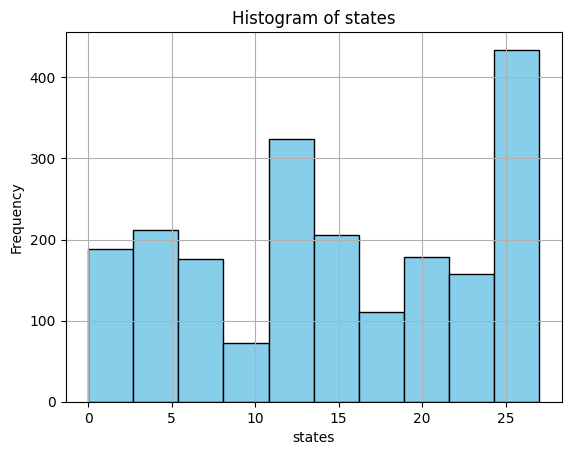

In [32]:
states = np.array(x['state'])  # Example feature values

plt.hist(states, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('states')
plt.ylabel('Frequency')
plt.title('Histogram of states')

plt.grid(True)
plt.savefig('Histogram of states.jpg') 
plt.show()

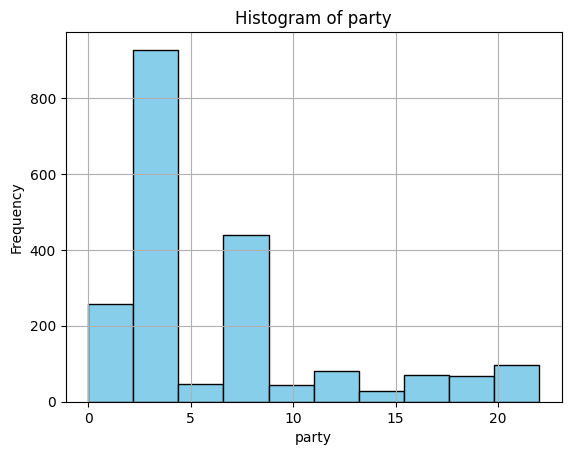

In [33]:
party = np.array(x['Party'])

plt.hist(party, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('party')
plt.ylabel('Frequency')
plt.title('Histogram of party')

plt.grid(True)
plt.savefig('Histogram of party.jpg') 
plt.show()

In [22]:
# Initialize KNN classifier

knn_classifier = KNeighborsClassifier(n_neighbors=27)

In [23]:
# Train the KNN classifier

knn_classifier.fit(x, y)

KNeighborsClassifier(n_neighbors=27)

In [24]:
test_data.head(5)

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH


In [25]:
selected_columns = ['Party', 'Criminal Case', 'Total Assets', 'Liabilities', 'state']
new_test_data = test_data[selected_columns].copy()

In [26]:
# Use LableEncoder to encode state and party column values to integers

new_test_data['state'] = label_encoders[0].transform(new_test_data['state'])
new_test_data['Party'] = label_encoders[1].transform(new_test_data['Party'])

In [27]:
# Extraxt integer values of Total Asssets and Liabilities

for i, asset in enumerate(new_test_data['Total Assets']):
    asset_str = str(asset)
    if 'Crore+' in asset_str:
        value = int(asset_str.split()[0])
        new_test_data.at[i, 'Total Assets'] = value * 10000000
    elif 'Lac+' in asset_str:
        value = int(asset_str.split()[0])
        new_test_data.at[i, 'Total Assets'] = value * 100000
    elif 'Thou+' in asset_str:
        value = int(asset_str.split()[0])
        new_test_data.at[i, 'Total Assets'] = value * 1000
    elif 'Hund+' in asset_str:
        value = int(asset_str.split()[0])
        new_test_data.at[i, 'Total Assets'] = value * 100

for i, asset in enumerate(new_test_data['Liabilities']):
    asset_str = str(asset)
    if 'Crore+' in asset_str:
        value = int(asset_str.split()[0])
        new_test_data.at[i, 'Liabilities'] = value * 10000000
    elif 'Lac+' in asset_str:
        value = int(asset_str.split()[0])
        new_test_data.at[i, 'Liabilities'] = value * 100000
    elif 'Thou+' in asset_str:
        value = int(asset_str.split()[0])
        new_test_data.at[i, 'Liabilities'] = value * 1000
    elif 'Hund+' in asset_str:
        value = int(asset_str.split()[0])
        new_test_data.at[i, 'Liabilities'] = value * 100

print(new_test_data)

      Party  Criminal Case Total Assets Liabilities  state
0         9              2    700000000   110000000     14
1         2              1     20000000     1300000     27
2        13              3    490000000    10000000     14
3         2              1     20000000           0     27
4        18              0    160000000    20000000     25
...     ...            ...          ...         ...    ...
1369      4              0     10000000           0     27
1370      3              1            0     1300000     18
1371      8              1     50000000           0      3
1372      4              1     20000000      500000      9
1373      4              0     90000000           0      4

[1374 rows x 5 columns]


In [28]:
pred = knn_classifier.predict(new_test_data)
original_pred = label_encoders[2].inverse_transform(pred)

In [29]:
df = pd.DataFrame({"ID":test_data["ID"],"Education":original_pred})
df.to_csv('predictions.csv', index=False)